# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

 Preprocessing

 Training

In [18]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5702 files belonging to 3 classes.


 Validation Image

In [19]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1426 files belonging to 3 classes.


## Building Model

In [20]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [26]:
cnn.add(tf.keras.layers.Flatten())

In [27]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [28]:
cnn.add(tf.keras.layers.Dropout(0.4)) 

In [29]:

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [30]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │    13,825,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,002,259 (57.23 MB)

 Trainable params: 15,002,259 (57.23 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling and Training Phase

In [31]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 173s 948ms/step - accuracy: 0.6563 - loss: 1.6232 - val_accuracy: 0.9011 - val_loss: 0.2460
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 173s 964ms/step - accuracy: 0.9069 - loss: 0.2487 - val_accuracy: 0.9719 - val_loss: 0.0912
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 169s 942ms/step - accuracy: 0.9623 - loss: 0.1101 - val_accuracy: 0.9544 - val_loss: 0.1151
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 167s 932ms/step - accuracy: 0.9564 - loss: 0.1200 - val_accuracy: 0.9818 - val_loss: 0.0636
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 166s 928ms/step - accuracy: 0.9709 - loss: 0.0790 - val_accuracy: 0.9832 - val_loss: 0.0553
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 166s 925ms/step - accuracy: 0.9790 - loss: 0.0598 - val_accuracy: 0.9881 - val_loss: 0.0428
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 166s 929ms/step - accuracy: 0.9769 - loss: 0.0707 - val_accuracy: 0.9797 - val_loss: 0.0736
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 165s 925ms/step - accuracy: 0.9784 -

## Evaluating Model

In [33]:

train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 196ms/step - accuracy: 0.9974 - loss: 0.0089
Training accuracy: 0.9978954792022705


In [34]:

val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.9923 - loss: 0.0234
Validation accuracy: 0.9894810914993286


### Saving Model

In [35]:
cnn.save('trained_plant_disease_model_potato.keras')

In [36]:

import json
with open('training_hist_potato.json','w') as f:
  json.dump(training_history.history,f)

In [37]:
training_history.history

{'accuracy': [0.8011224269866943,
  0.9309014678001404,
  0.9650999903678894,
  0.9689582586288452,
  0.9745703339576721,
  0.9835145473480225,
  0.9780778884887695,
  0.9850929379463196,
  0.9940371513366699,
  0.9924587607383728],
 'loss': [0.6699512600898743,
  0.1872818022966385,
  0.10701850801706314,
  0.08689630776643753,
  0.06951986998319626,
  0.050374265760183334,
  0.06707742810249329,
  0.04275327920913696,
  0.017588229849934578,
  0.023818375542759895],
 'val_accuracy': [0.9011220335960388,
  0.9719495177268982,
  0.9544179439544678,
  0.9817671775817871,
  0.9831697344779968,
  0.9880785346031189,
  0.9796633720397949,
  0.986676037311554,
  0.9775596261024475,
  0.9894810914993286],
 'val_loss': [0.24596461653709412,
  0.09116405248641968,
  0.11508331447839737,
  0.06358442455530167,
  0.05532217398285866,
  0.04279647767543793,
  0.0736047774553299,
  0.03820357099175453,
  0.06212329864501953,
  0.031501349061727524]}

In [38]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


 Accuracy Visualization

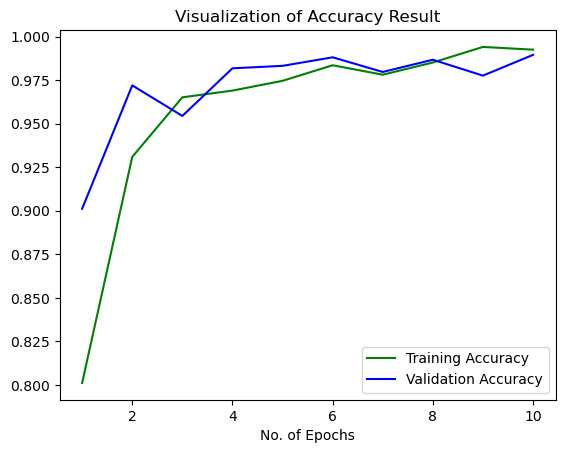

In [40]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

other metrics for model evaluation

In [41]:
class_name = validation_set.class_names

In [42]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1426 files belonging to 3 classes.


In [43]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1426/1426 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step


In [44]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)


In [45]:
Y_true

<tf.Tensor: shape=(1426,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [46]:
predicted_categories

<tf.Tensor: shape=(1426,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [48]:

print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

Potato___Early_blight       0.99      0.99      0.99       485
 Potato___Late_blight       0.98      0.99      0.99       485
     Potato___healthy       0.99      1.00      0.99       456

             accuracy                           0.99      1426
            macro avg       0.99      0.99      0.99      1426
         weighted avg       0.99      0.99      0.99      1426



### Confusion Matrix Visualization

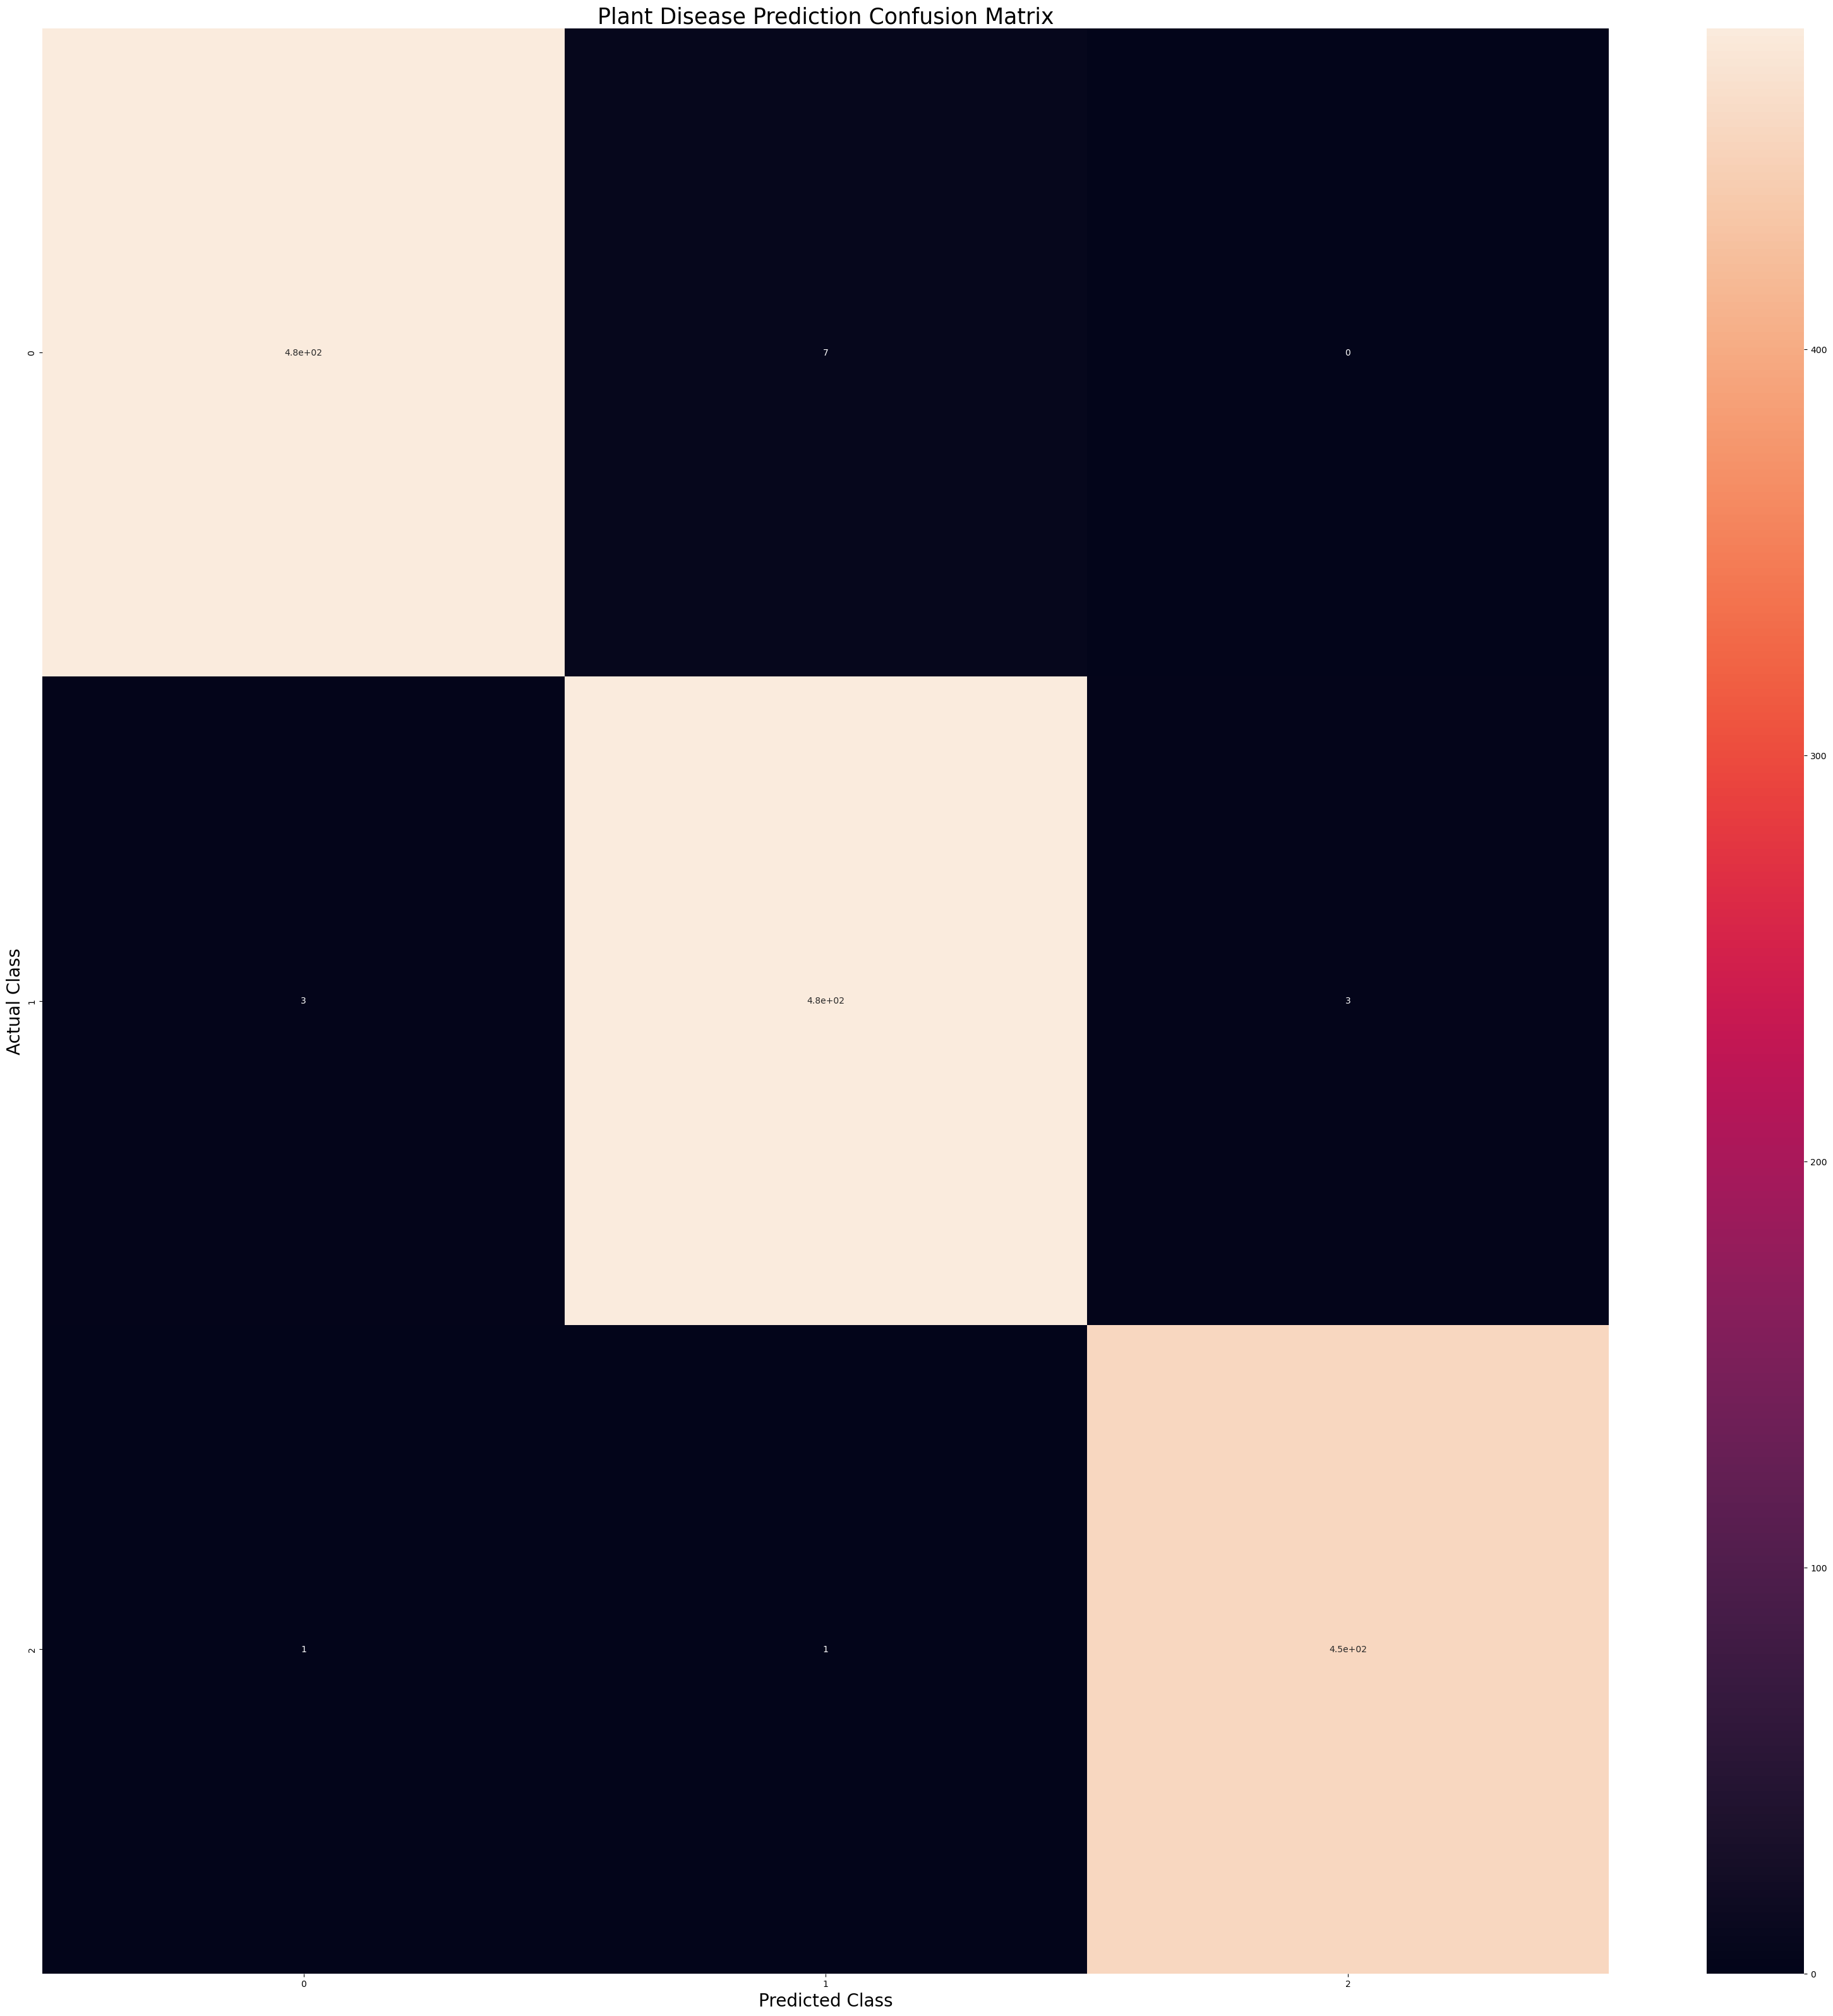

In [49]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()